In [35]:
import numpy as np
import pandas as pd
import time 
import datetime as datetime
import glob
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
np.random.seed(1)

In [10]:
col_names = [0,1,2,3]
onemonth = pd.DataFrame(columns = col_names)
for filename in glob.glob("TrueFX/*.csv"):
    print(filename)
    tmp = pd.read_csv(filename,header=None)
    onemonth = onemonth.append(tmp)
onemonth = onemonth.rename(index=str, columns={0:'CCY', 1:'Timestep', 2:'Bid', 3: 'Ask'})
onemonth.to_csv('TrueFX.csv')

TrueFX/EURJPY-2019-03.csv
TrueFX/AUDNZD-2019-03.csv
TrueFX/GBPJPY-2019-03.csv
TrueFX/EURCHF-2019-03.csv
TrueFX/GBPUSD-2019-03.csv
TrueFX/CADJPY-2019-03.csv
TrueFX/CHFJPY-2019-03.csv
TrueFX/EURUSD-2019-03.csv
TrueFX/AUDJPY-2019-03.csv
TrueFX/USDCHF-2019-03.csv
TrueFX/AUDUSD-2019-03.csv
TrueFX/USDCAD-2019-03.csv
TrueFX/NZDUSD-2019-03.csv
TrueFX/USDJPY-2019-03.csv


In [12]:
name = pd.read_csv('TickData/LP-1-STRM-1-AUDUSD.csv')
col_names = list(name.columns.values)
LP = pd.DataFrame(columns = col_names)
for filename in glob.glob("TickData/*.csv"):
    print(filename)
    tmp = pd.read_csv(filename)
    LP = LP.append(tmp)
LP.to_csv('Integral.csv')

TickData/LP-3-STRM-3-USDCAD.csv
TickData/LP-5-STRM-5-USDCHF.csv
TickData/LP-1-STRM-1-USDCAD.csv
TickData/LP-5-STRM-5-EURUSD.csv
TickData/LP-4-STRM-4-NZDUSD.csv
TickData/LP-2-STRM-2-EURUSD.csv
TickData/LP-2-STRM-2-USDCHF.csv
TickData/LP-4-STRM-4-USDCAD.csv
TickData/LP-3-STRM-3-NZDUSD.csv
TickData/LP-1-STRM-1-NZDUSD.csv
TickData/LP-1-STRM-1-AUDUSD.csv
TickData/LP-3-STRM-3-GBPUSD.csv
TickData/LP-1-STRM-1-GBPUSD.csv
TickData/LP-3-STRM-3-AUDUSD.csv
TickData/LP-2-STRM-2-USDJPY.csv
TickData/LP-5-STRM-5-USDSEK.csv
TickData/LP-4-STRM-4-AUDUSD.csv
TickData/LP-4-STRM-4-GBPUSD.csv
TickData/LP-2-STRM-2-USDSEK.csv
TickData/LP-5-STRM-5-USDJPY.csv
TickData/LP-4-STRM-4-USDCHF.csv
TickData/LP-2-STRM-2-USDCAD.csv
TickData/LP-4-STRM-4-EURUSD.csv
TickData/LP-5-STRM-5-NZDUSD.csv
TickData/LP-1-STRM-1-USDCHF.csv
TickData/LP-3-STRM-3-EURUSD.csv
TickData/LP-5-STRM-5-USDCAD.csv
TickData/LP-3-STRM-3-USDCHF.csv
TickData/LP-1-STRM-1-EURUSD.csv
TickData/LP-2-STRM-2-NZDUSD.csv
TickData/LP-2-STRM-2-GBPUSD.csv
TickData

In [23]:
LP['time'] = pd.to_datetime(LP['time'])
LP.head()

,provider,stream,currency pair,time,bid price,bid volume,ask price,ask volume,guid,tier,status,quote type
0,LP-3,STRM-3,USDCAD,2019-02-01 00:00:00.130,1.31266,1000000,1.31278,1000000,G-3c369d52-168a65ae082-LP-3Z-9a914,1,Active,MQ
1,LP-3,STRM-3,USDCAD,2019-02-01 00:00:00.130,1.31267,1000000,1.31278,1000000,G-3c369d52-168a65ae082-LP-3Z-9a915,1,Active,MQ
2,LP-3,STRM-3,USDCAD,2019-02-01 00:00:00.150,1.31267,1000000,1.31281,1000000,G-3c369d52-168a65ae096-LP-3Z-9a916,1,Active,MQ
3,LP-3,STRM-3,USDCAD,2019-02-01 00:00:00.150,1.31271,1000000,1.31281,1000000,G-3c369d52-168a65ae096-LP-3Z-9a917,1,Active,MQ
4,LP-3,STRM-3,USDCAD,2019-02-01 00:00:00.211,1.31270,1000000,1.31281,1000000,G-3c369d52-168a65ae0d3-LP-3Z-9a918,1,Active,MQ


In [34]:
providers = LP.provider.unique()
CCY = LP['currency pair'].unique()
print(providers)
print(CCY)

['LP-3' 'LP-5' 'LP-1' 'LP-4' 'LP-2']
['USDCAD' 'USDCHF' 'EURUSD' 'NZDUSD' 'AUDUSD' 'GBPUSD' 'USDJPY' 'USDSEK']


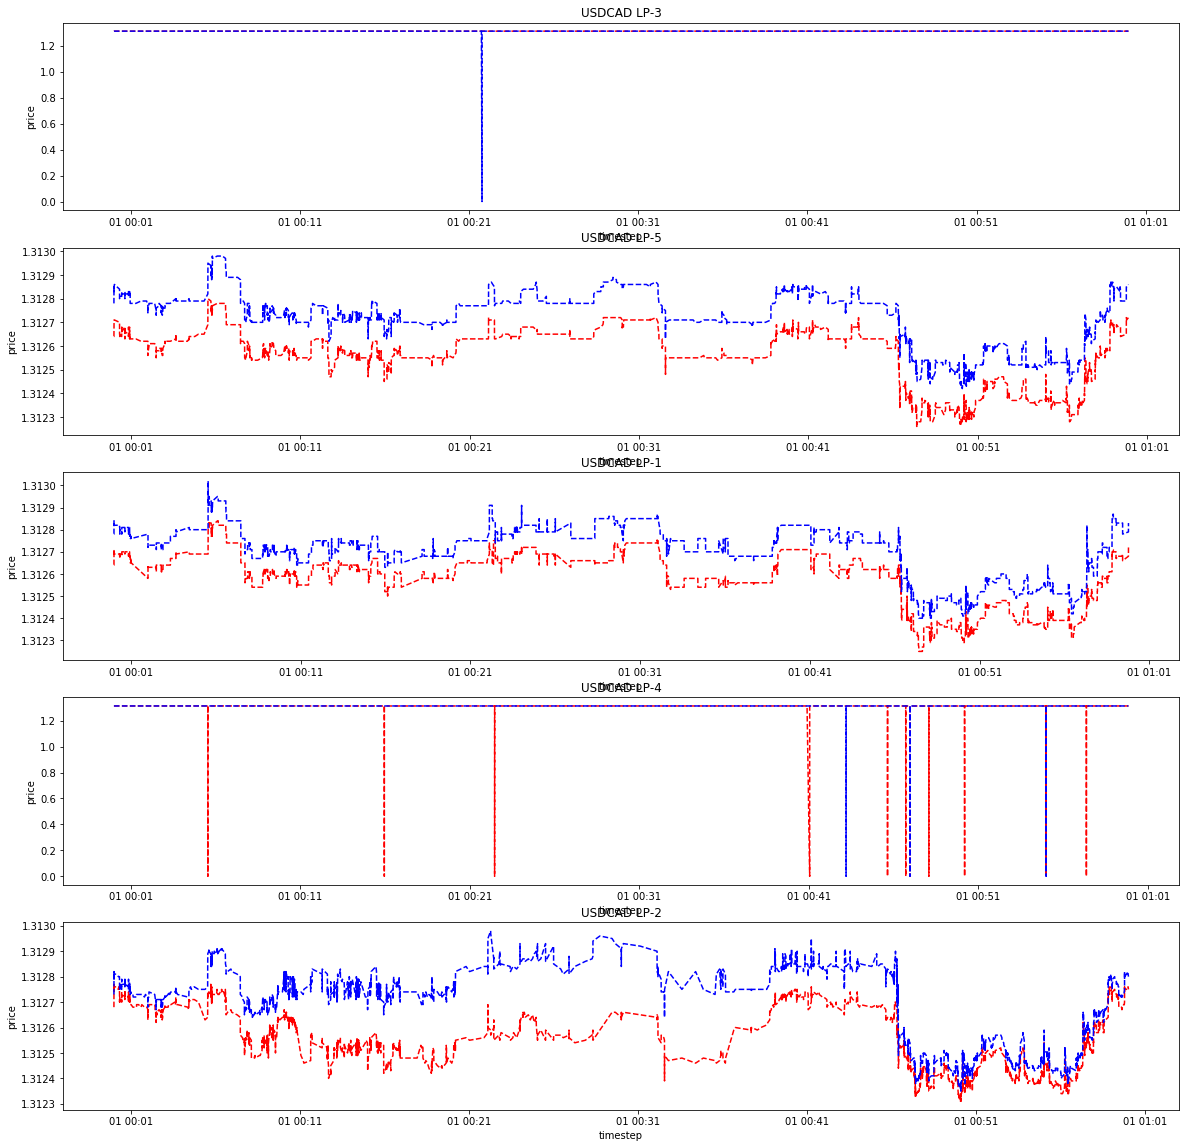

In [36]:
cur = 'USDCAD'
fig = plt.figure()
gs = gridspec.GridSpec(len(providers),1)
for n in range(len(providers)):
    title = cur + " " + providers[n]
    ax = fig.add_subplot(gs[n, 0]) 
    tmp = LP[LP.provider == providers[n]]
    tmp = tmp[tmp['currency pair'] == cur]
    t = tmp.time.values
    b = tmp['bid price'].values
    a = tmp['ask price'].values
    ax.plot(t, b, 'r--', t, a, 'b--')
    ax.set(xlabel='timestep', ylabel='price')
    ax.set_title(title)

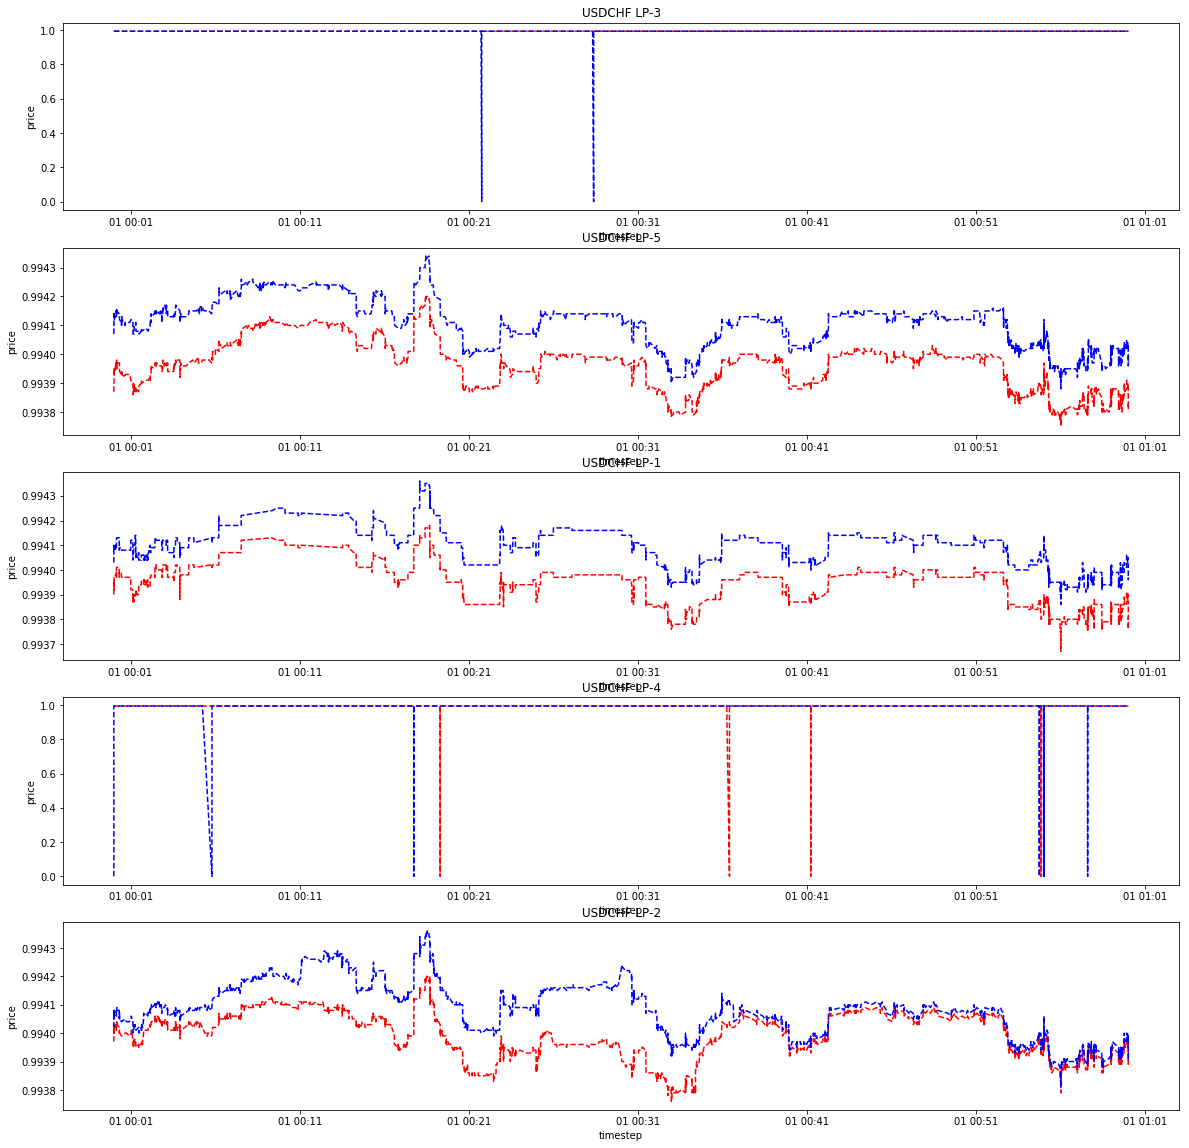

In [37]:
cur = 'USDCHF'
fig = plt.figure()
gs = gridspec.GridSpec(len(providers),1)
for n in range(len(providers)):
    title = cur + " " + providers[n]
    ax = fig.add_subplot(gs[n, 0]) 
    tmp = LP[LP.provider == providers[n]]
    tmp = tmp[tmp['currency pair'] == cur]
    t = tmp.time.values
    b = tmp['bid price'].values
    a = tmp['ask price'].values
    ax.plot(t, b, 'r--', t, a, 'b--')
    ax.set(xlabel='timestep', ylabel='price')
    ax.set_title(title)

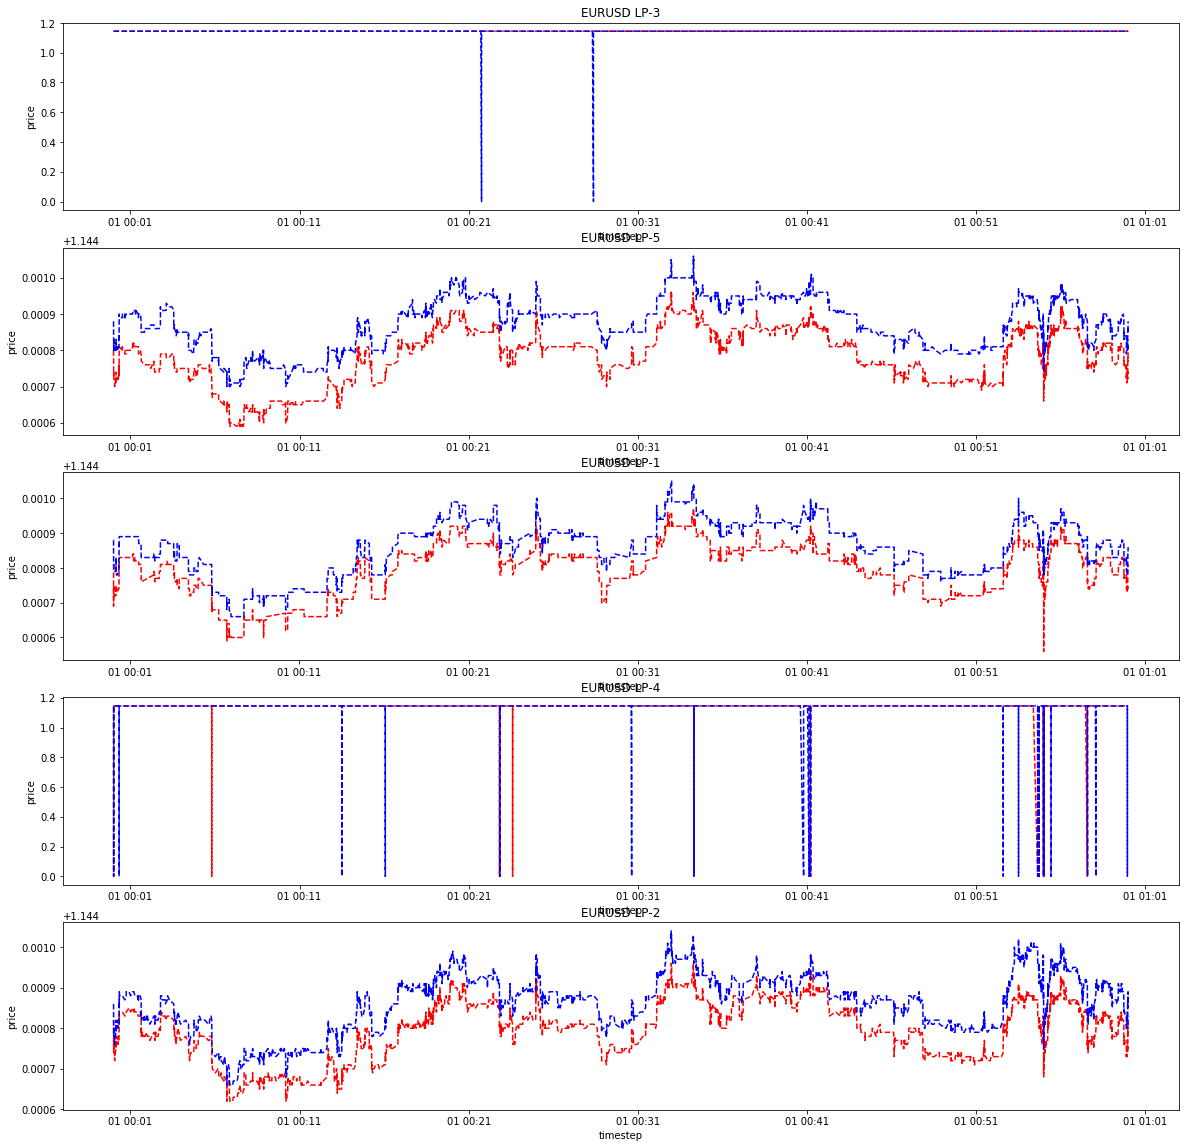

In [38]:
cur = 'EURUSD'
fig = plt.figure()
gs = gridspec.GridSpec(len(providers),1)
for n in range(len(providers)):
    title = cur + " " + providers[n]
    ax = fig.add_subplot(gs[n, 0]) 
    tmp = LP[LP.provider == providers[n]]
    tmp = tmp[tmp['currency pair'] == cur]
    t = tmp.time.values
    b = tmp['bid price'].values
    a = tmp['ask price'].values
    ax.plot(t, b, 'r--', t, a, 'b--')
    ax.set(xlabel='timestep', ylabel='price')
    ax.set_title(title)

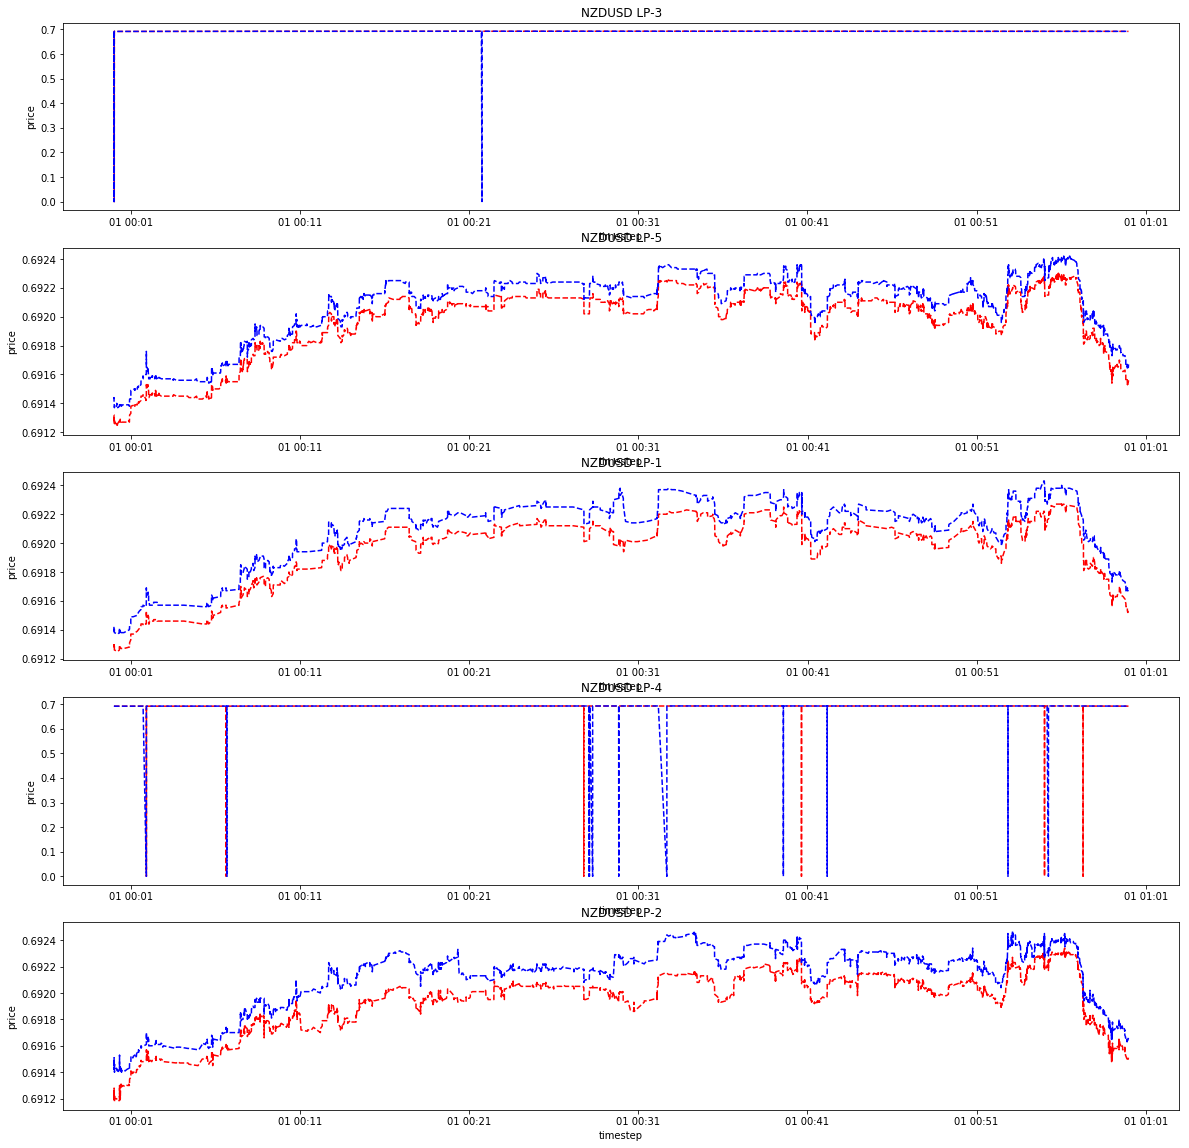

In [39]:
cur = 'NZDUSD'
fig = plt.figure()
gs = gridspec.GridSpec(len(providers),1)
for n in range(len(providers)):
    title = cur + " " + providers[n]
    ax = fig.add_subplot(gs[n, 0]) 
    tmp = LP[LP.provider == providers[n]]
    tmp = tmp[tmp['currency pair'] == cur]
    t = tmp.time.values
    b = tmp['bid price'].values
    a = tmp['ask price'].values
    ax.plot(t, b, 'r--', t, a, 'b--')
    ax.set(xlabel='timestep', ylabel='price')
    ax.set_title(title)

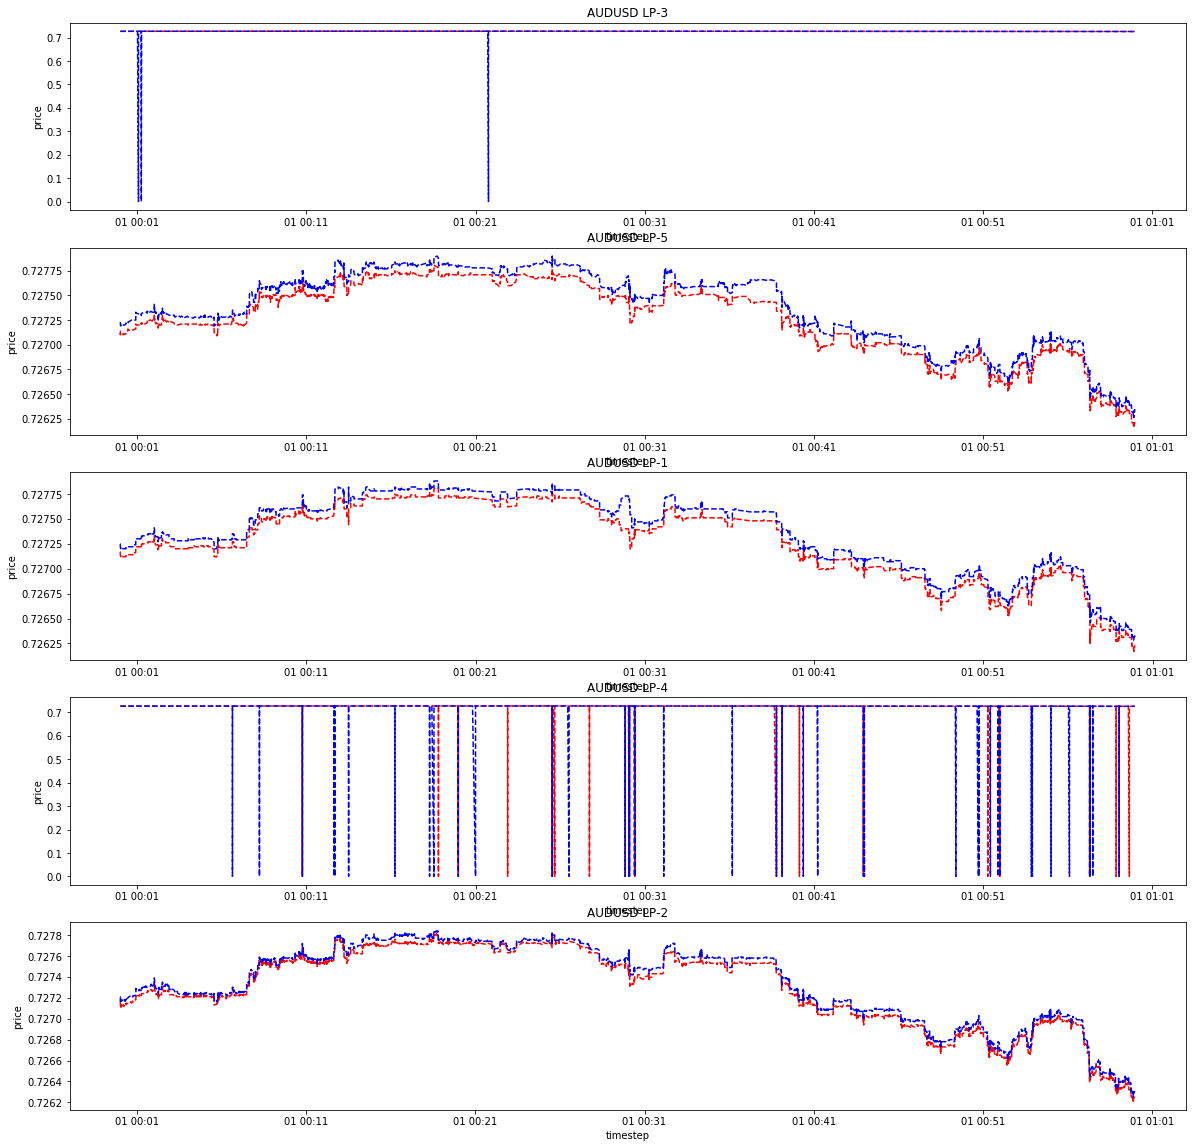

In [40]:
cur = 'AUDUSD'
fig = plt.figure()
gs = gridspec.GridSpec(len(providers),1)
for n in range(len(providers)):
    title = cur + " " + providers[n]
    ax = fig.add_subplot(gs[n, 0]) 
    tmp = LP[LP.provider == providers[n]]
    tmp = tmp[tmp['currency pair'] == cur]
    t = tmp.time.values
    b = tmp['bid price'].values
    a = tmp['ask price'].values
    ax.plot(t, b, 'r--', t, a, 'b--')
    ax.set(xlabel='timestep', ylabel='price')
    ax.set_title(title)

In [ ]:
cur = 'GBUSD'
fig = plt.figure()
gs = gridspec.GridSpec(len(providers),1)
for n in range(len(providers)):
    title = cur + " " + providers[n]
    ax = fig.add_subplot(gs[n, 0]) 
    tmp = LP[LP.provider == providers[n]]
    tmp = tmp[tmp['currency pair'] == cur]
    t = tmp.time.values
    b = tmp['bid price'].values
    a = tmp['ask price'].values
    ax.plot(t, b, 'r--', t, a, 'b--')
    ax.set(xlabel='timestep', ylabel='price')
    ax.set_title(title)